# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty.

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [233]:
%pip install --upgrade plotly

## Import Statements

In [234]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [235]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [236]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

In [237]:
df_hh_income.shape, df_pct_poverty.shape, df_pct_completed_hs.shape, df_share_race_city.shape, df_fatalities.shape

((29322, 3), (29329, 3), (29329, 3), (29268, 7), (2535, 14))

In [238]:
df_fatalities.sample(5)

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
1792,2003,Kenneth Jack Kennedy,30/10/16,shot,vehicle,34.00,M,W,Kingman,AZ,False,other,Car,False
73,113,John Barry Marshall,30/01/15,shot,gun,48.00,M,W,Billings,MT,False,attack,Foot,False
578,703,Tyler Alexander Dattilo,05/08/15,shot,knife,18.00,M,W,Louisville,KY,False,attack,Not fleeing,False
685,879,William Chau,09/09/15,shot,knife,59.00,M,A,El Monte,CA,False,attack,Not fleeing,False
945,1092,Mharloun Verdejo Saycon,14/12/15,shot,knife,39.00,M,A,Long Beach,CA,False,other,Not fleeing,False


In [239]:
df_share_race_city.sample(5)

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
26037,TX,Teague city,66.7,19,0.9,0.2,20.1
12225,MI,Rose City city,96.9,0.2,1.2,0.3,1.7
22532,PA,New Eagle borough,97.3,0.8,0.1,0.6,0.5
25737,TX,Preston CDP,94.8,0.1,1.2,0.6,2.1
21568,PA,Belmont CDP,96.8,1.1,0,1.1,0.8


In [240]:
df_hh_income.sample(5)

,Geographic Area,City,Median Income
8085,IN,Winamac town,38514
13867,MO,Country Life Acres village,"250,000+"
19597,OH,Greenwich village,38393
23052,PA,Thompsonville CDP,89091
16193,NJ,Oak Valley CDP,62750


In [241]:
df_pct_poverty.sample(5)

,Geographic Area,City,poverty_rate
13945,MO,Ethel town,60.8
28709,WI,Kronenwetter village,6.3
24534,TX,Ackerly city,20.9
10655,LA,Ossun CDP,35.9
1953,CA,Almanor CDP,-


In [242]:
df_pct_completed_hs.sample(5)

,Geographic Area,City,percent_completed_hs
6394,IL,Dunfermline village,84.3
19237,OH,Batavia village,76.1
15560,NE,Taylor village,90.8
12605,MN,Dundee city,84.6
2166,CA,Cedar Ridge CDP,92.1


In [243]:
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [244]:
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'])
df_fatalities['date'].dtypes

dtype('<M8[ns]')

In [245]:
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [246]:
cols = ['share_asian', 'share_white', 'share_black', 'share_native_american', 'share_hispanic']
df_share_race_city[cols] = df_share_race_city[cols].apply(pd.to_numeric, errors='coerce', axis=1)
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Geographic area        29268 non-null  object 
 1   City                   29268 non-null  object 
 2   share_white            29248 non-null  float64
 3   share_black            29248 non-null  float64
 4   share_native_american  29248 non-null  float64
 5   share_asian            29248 non-null  float64
 6   share_hispanic         29248 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.6+ MB


In [247]:
df_pct_poverty.info(), df_pct_completed_hs.info(), df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322

(None, None, None)

In [248]:
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].str.replace('-', '')
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], downcast="float")
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].str.replace('-', '')
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], downcast="float")
df_pct_poverty.info(), df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29128 non-null  float32
dtypes: float32(1), object(2)
memory usage: 573.0+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Geographic Area       29329 non-null  object 
 1   City                  29329 non-null  object 
 2   percent_completed_hs  29132 non-null  float32
dtypes: float32(1), object(2)
memory usage: 573.0+ KB


(None, None)

## Data Cleaning


In [249]:
df_fatalities = df_fatalities.dropna()
df_pct_poverty['poverty_rate'] = df_pct_poverty['poverty_rate'].fillna(0)
df_pct_completed_hs['percent_completed_hs'] = df_pct_completed_hs['percent_completed_hs'].fillna(0)

In [250]:
df_fatalities.duplicated().values.any(), df_hh_income.duplicated().values.any(), df_pct_completed_hs.duplicated().values.any(), df_pct_poverty.duplicated().values.any(), df_share_race_city.duplicated().values.any()

(False, False, False, False, False)

In [251]:
df_fatalities.info(), df_pct_poverty.info(), df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   object        
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   float64       
 6   gender                   2254 non-null   object        
 7   race                     2254 non-null   object        
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   object        
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   object        
 12  flee                     2254 non-

(None, None, None)

# The Poverty Rate in each US State


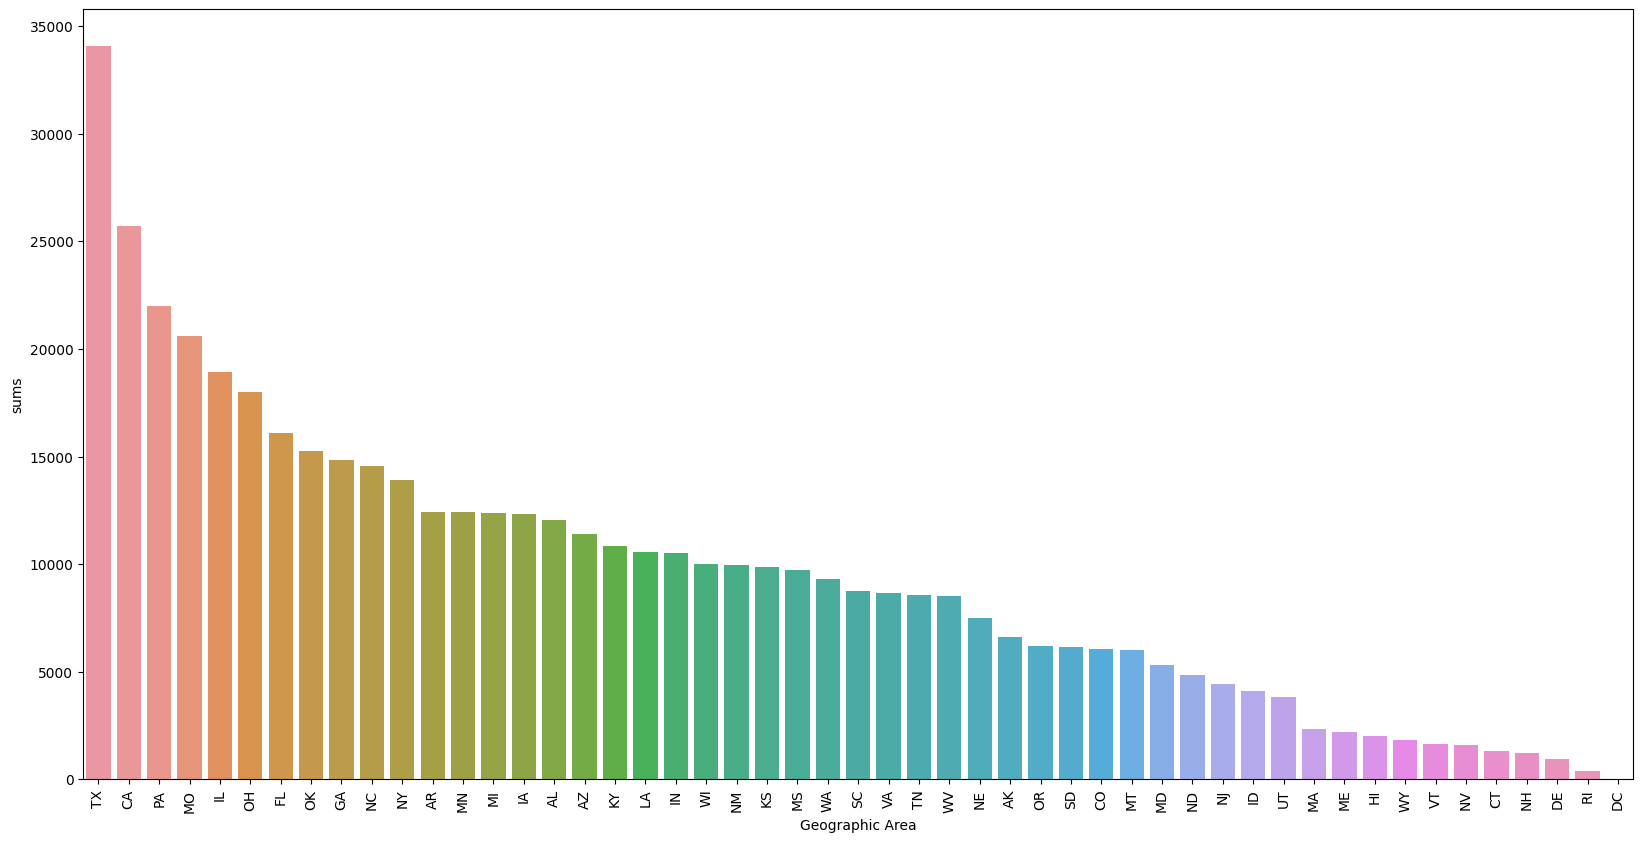

In [252]:
plt.figure(figsize=(20,10))

ax = df_pct_poverty.groupby('Geographic Area')['poverty_rate'].sum().sort_values(ascending=False).reset_index(name='sums')
sns.barplot(data=ax,
            x='Geographic Area',
            y='sums')

plt.xticks(rotation = 90)
plt.show()

# The High School Graduation Rate by US State


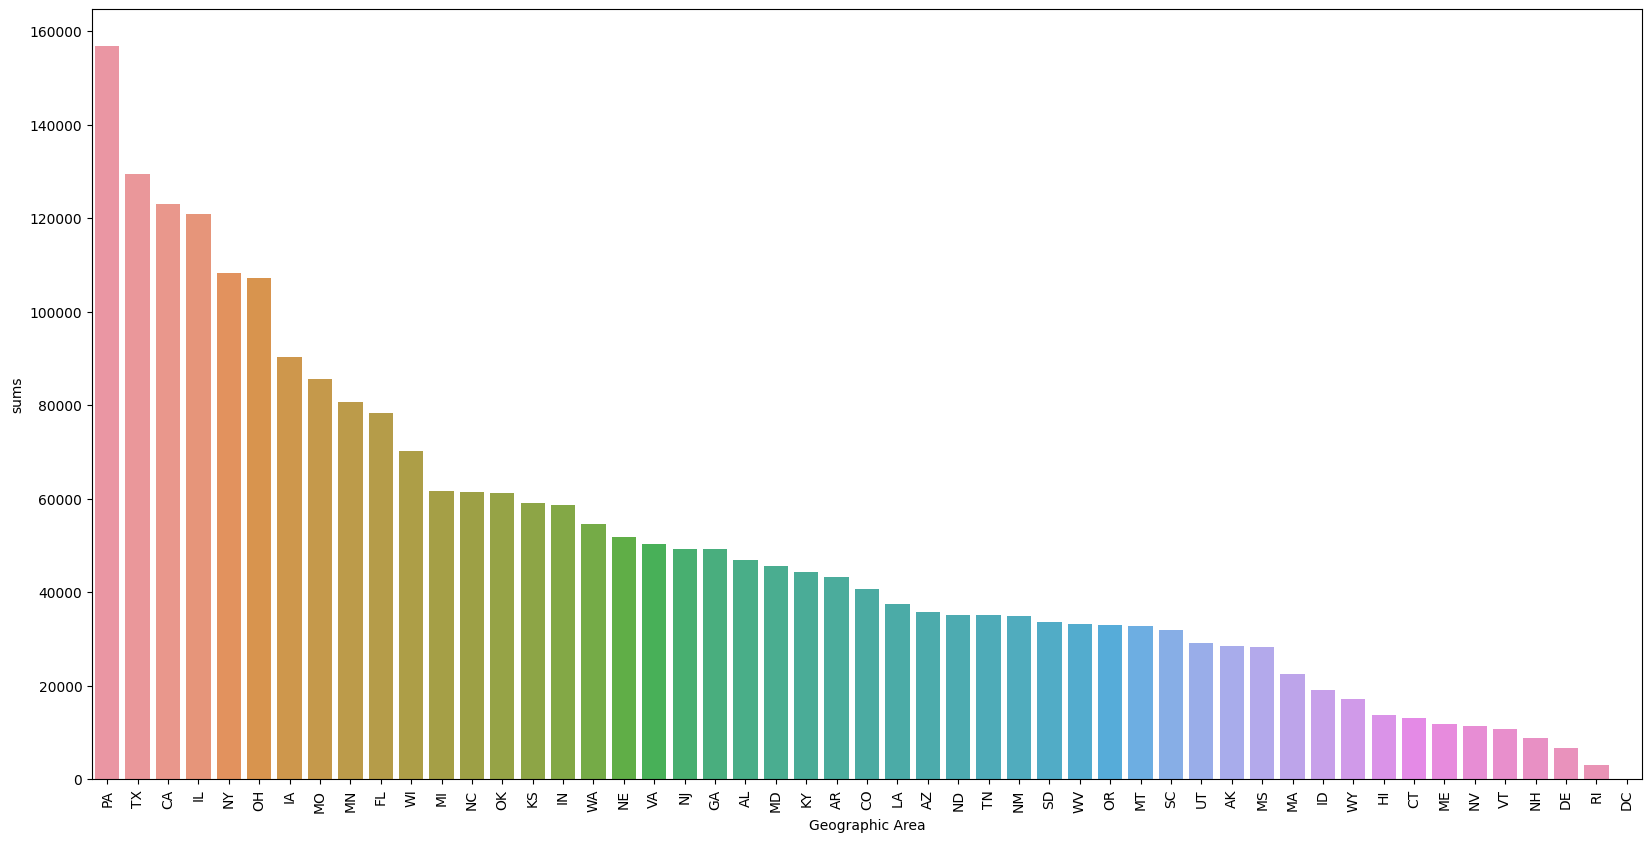

In [253]:
plt.figure(figsize=(20,10))

ax = df_pct_completed_hs.groupby('Geographic Area')['percent_completed_hs'].sum().sort_values(ascending=False).reset_index(name='sums')
sns.barplot(data=ax,
            x='Geographic Area',
            y='sums')

plt.xticks(rotation = 90)
plt.show()

# The Relationship between Poverty Rates and High School Graduation Rates
  

<Figure size 2000x1000 with 0 Axes>

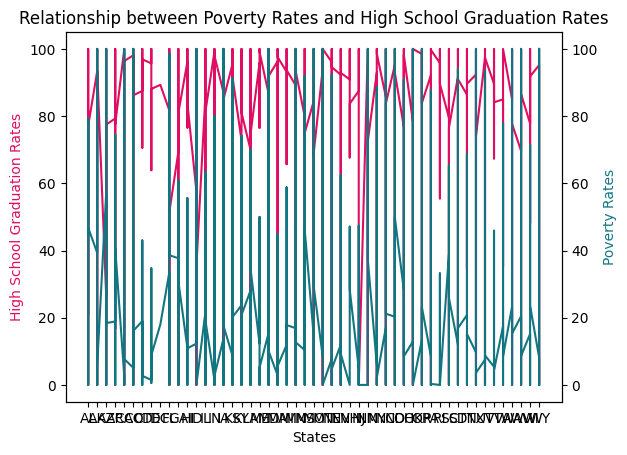

In [254]:
plt.figure(figsize=(20,10))

fig,ax = plt.subplots()
plt.title('Relationship between Poverty Rates and High School Graduation Rates')

ax.plot(df_pct_completed_hs['Geographic Area'], df_pct_completed_hs['percent_completed_hs'], color='#DF0E62')
ax.set_xlabel('States')
ax.set_ylabel('High School Graduation Rates', color='#DF0E62')

ax2 = ax.twinx()
ax2.plot(df_pct_poverty['Geographic Area'], df_pct_poverty['poverty_rate'], color='#127681')
ax2.set_ylabel('Poverty Rates', color='#127681')

plt.xticks(rotation = 90)
plt.show()

In [255]:
df = pd.merge(df_pct_completed_hs, df_pct_poverty, how='inner', left_on=['Geographic Area','City'], right_on=['Geographic Area','City'])
df

,Geographic Area,City,percent_completed_hs,poverty_rate
0,AL,Abanda CDP,21.20,78.80
1,AL,Abbeville city,69.10,29.10
2,AL,Adamsville city,78.90,25.50
3,AL,Addison town,81.40,30.70
4,AL,Akron town,68.60,42.00
...,...,...,...,...
29324,WY,Woods Landing-Jelm CDP,100.00,18.60
29325,WY,Worland city,85.60,15.30
29326,WY,Wright town,89.20,5.90
29327,WY,Yoder town,79.40,5.40


#### Estimate (KDE) and/or scatter plot to visualise the same relationship

<Figure size 2000x1000 with 0 Axes>

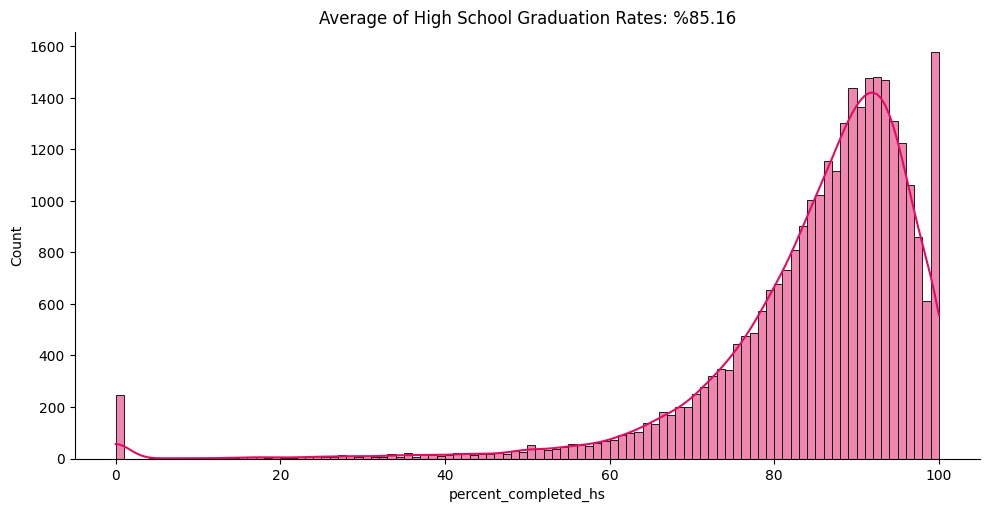

In [256]:
plt.figure(figsize=(20,10))

sns.displot(data=df_pct_completed_hs['percent_completed_hs'],
            kde=True,
            aspect=2,
            bins=100,
            color='#DF0E62')

plt.title(f'Average of High School Graduation Rates: %{(df_pct_completed_hs.percent_completed_hs.mean()):.4}')

plt.show()

<Figure size 2000x1000 with 0 Axes>

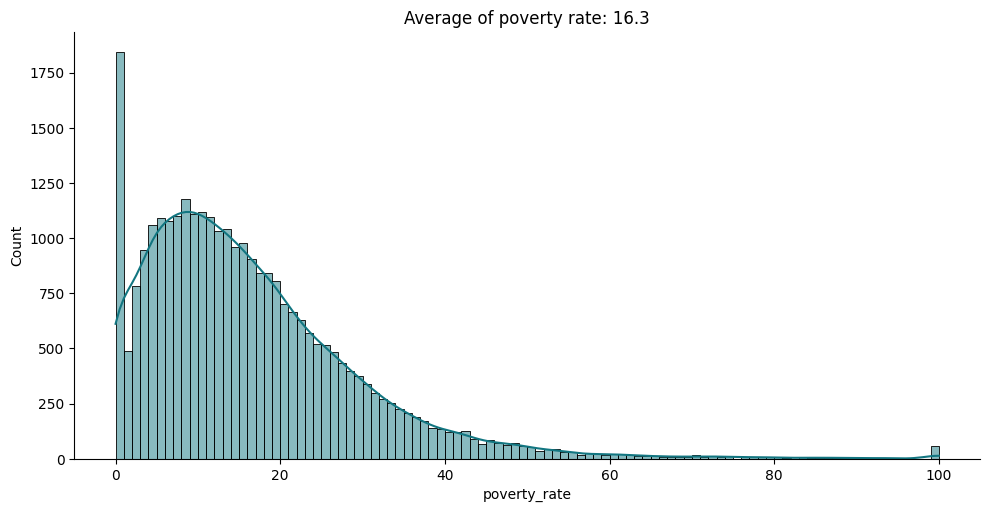

In [257]:
plt.figure(figsize=(20,10))

sns.displot(data=df_pct_poverty['poverty_rate'],
            kde=True,
            aspect=2,
            bins=100,
            color='#127681')

plt.title(f'Average of poverty rate: {(df_pct_poverty.poverty_rate.mean()):.3}')

plt.show()

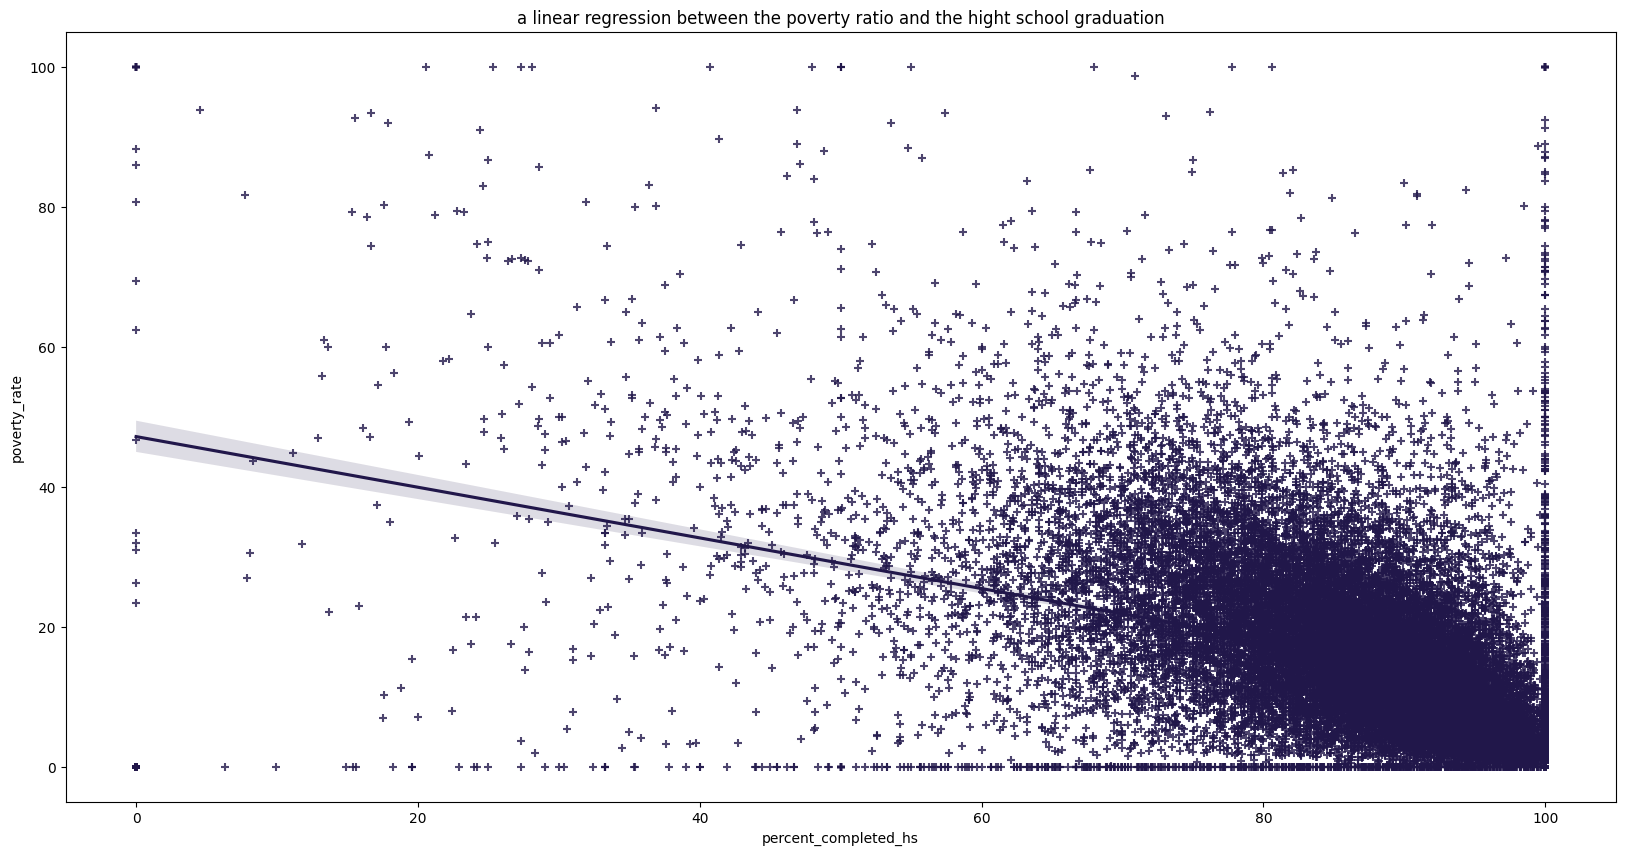

In [258]:
plt.figure(figsize=(20,10))

ax = sns.regplot(x="percent_completed_hs", y="poverty_rate", data=df, marker="+", color="#21174A")

plt.title('a linear regression between the poverty ratio and the hight school graduation')

plt.show()

# The Racial Makeup of Each US State


<ipython-input-259-fc287be6d4c7>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cf = df_share_race_city.groupby('Geographic area')['share_white',	'share_black', 'share_native_american',	'share_asian',	'share_hispanic'].sum()


<Figure size 2000x1000 with 0 Axes>

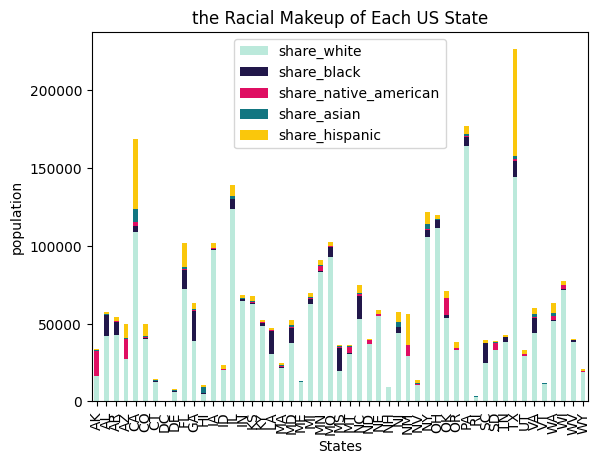

In [259]:
plt.figure(figsize=(20,10))

cf = df_share_race_city.groupby('Geographic area')['share_white',	'share_black', 'share_native_american',	'share_asian',	'share_hispanic'].sum()
cf.plot(kind='bar', stacked=True, color=['#BBE9DB', '#21174A', '#DF0E62', '#127681', '#FAC70B'])
plt.xlabel('States')
plt.ylabel('population')

plt.title('the Racial Makeup of Each US State')

plt.show()

# Comparing the Total Number of Deaths of Men and Women


In [260]:
sampleـpopulation = 2254
df_fatalities.groupby('gender')['id'].count() / sampleـpopulation

gender
F   0.04
M   0.96
Name: id, dtype: float64

# The Age and Manner of Death


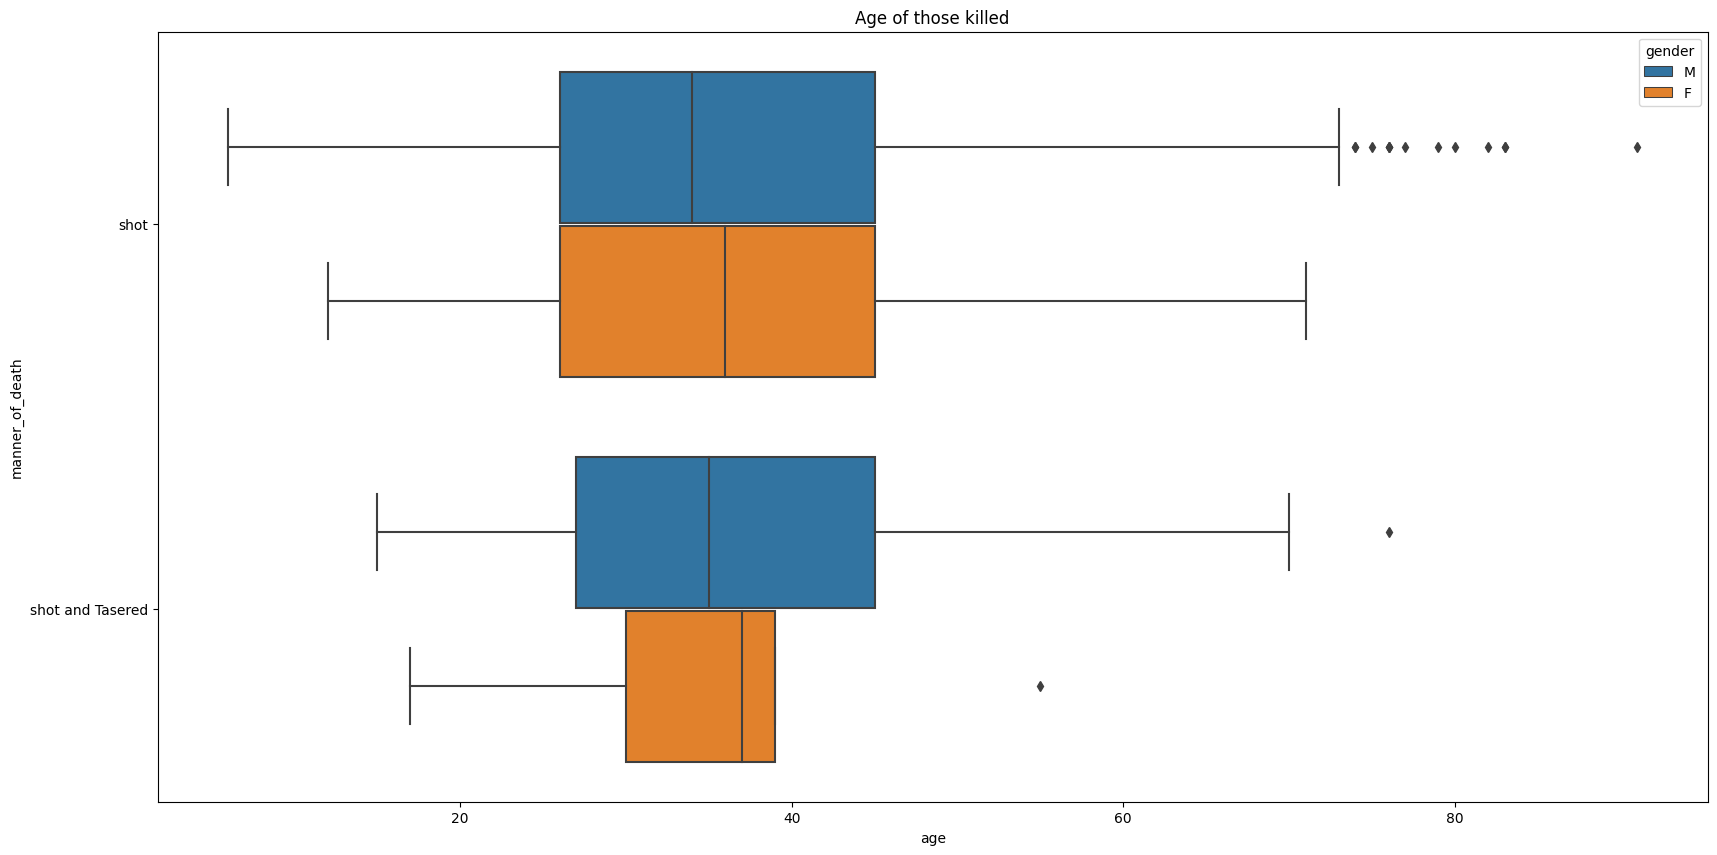

In [261]:
plt.figure(figsize=(20,10))

sns.boxplot(data=df_fatalities, x='age', y='manner_of_death', hue='gender')

plt.title('Age of those killed')

plt.show()

Percentage of people killed were under 25 years old.  

In [262]:
print(f"%{100*(df_fatalities[df_fatalities['age'] < 25].shape[0] / df_fatalities.shape[0]):.4} of people killed were under 25 years old")

%18.72 of people killed were under 25 years old


Distribution of ages of the people killed by police(Histogram and KDE plot)

<Axes: xlabel='age', ylabel='Count'>

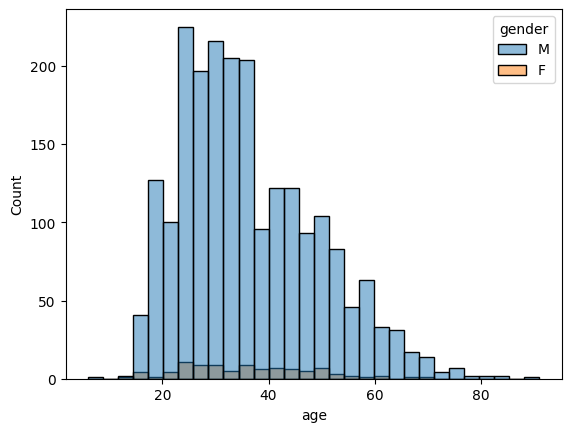

In [263]:
sns.histplot(data=df_fatalities,
             x='age',
             hue='gender')

<Figure size 2000x1000 with 0 Axes>

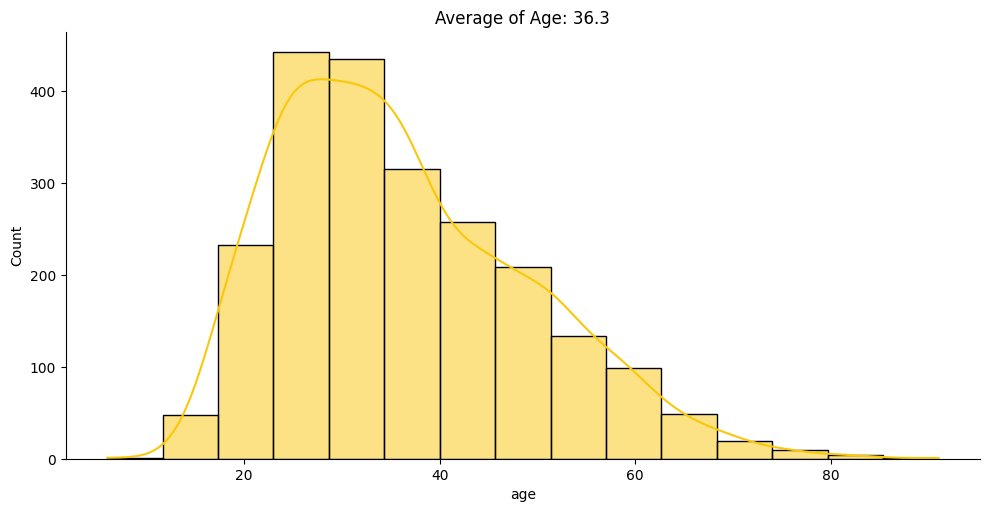

In [264]:
plt.figure(figsize=(20,10))

sns.displot(data=df_fatalities['age'],
            kde=True,
            aspect=2,
            bins=15,
            color='#FAC70B')

plt.title(f'Average of Age: {(df_fatalities.age.mean()):.3}')

plt.show()

<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
<__array_function__ internals>:180: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


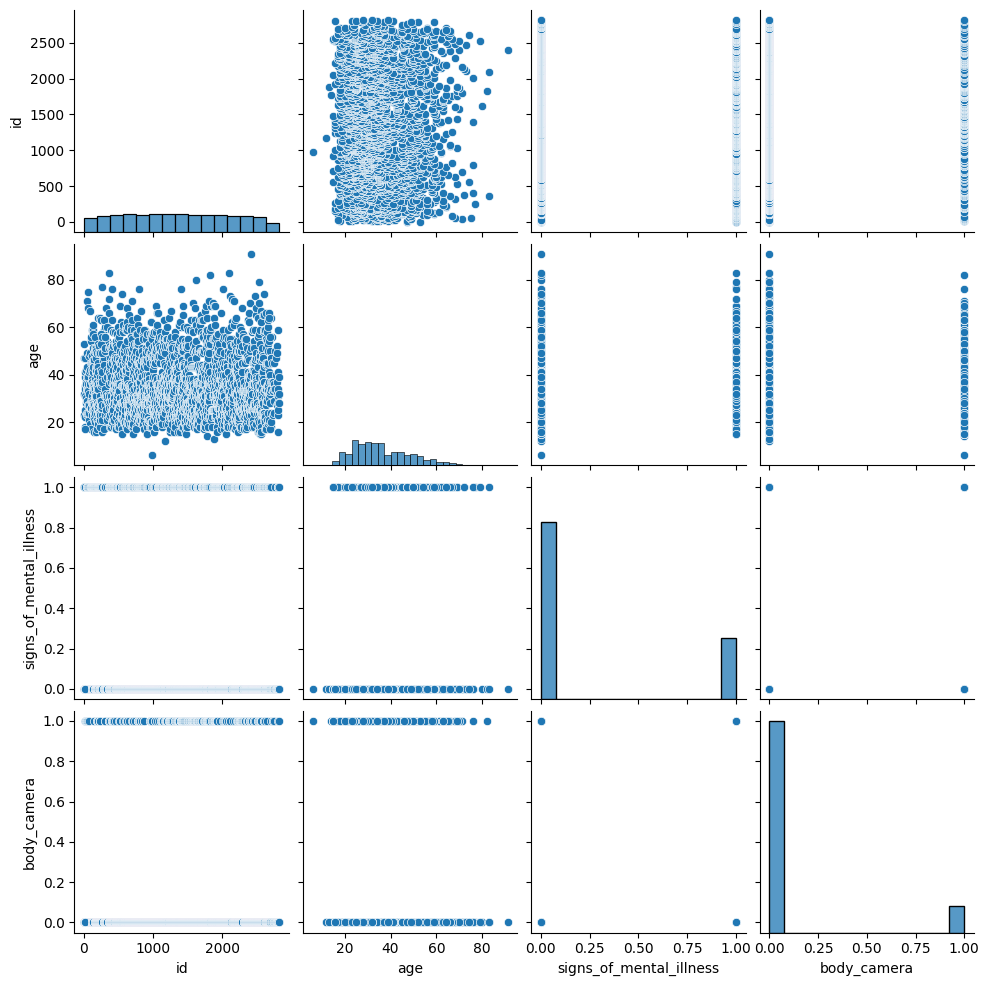

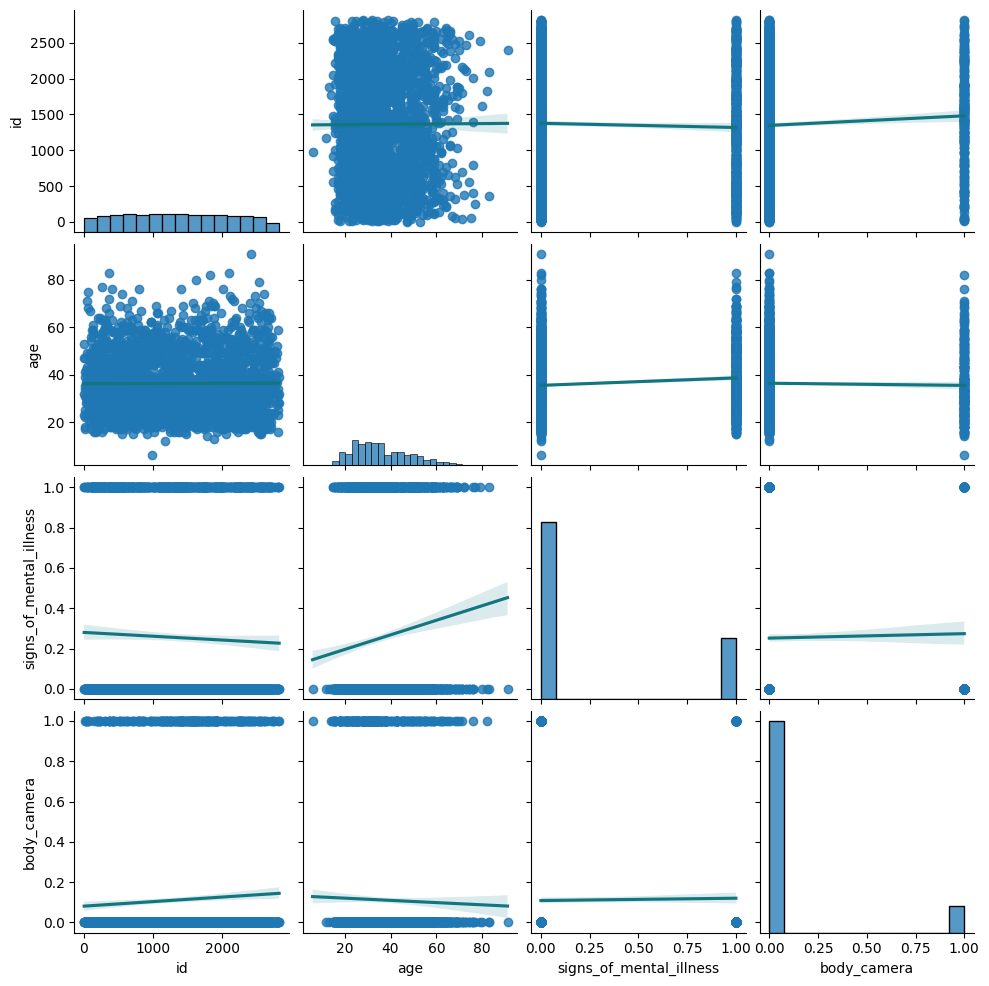

In [265]:
sns.pairplot(df_fatalities)
sns.pairplot(df_fatalities, kind='reg', plot_kws={'line_kws':{'color': '#127681'}})
plt.show()

# Were People Armed?

How many of the people killed by police were armed with guns versus unarmed?

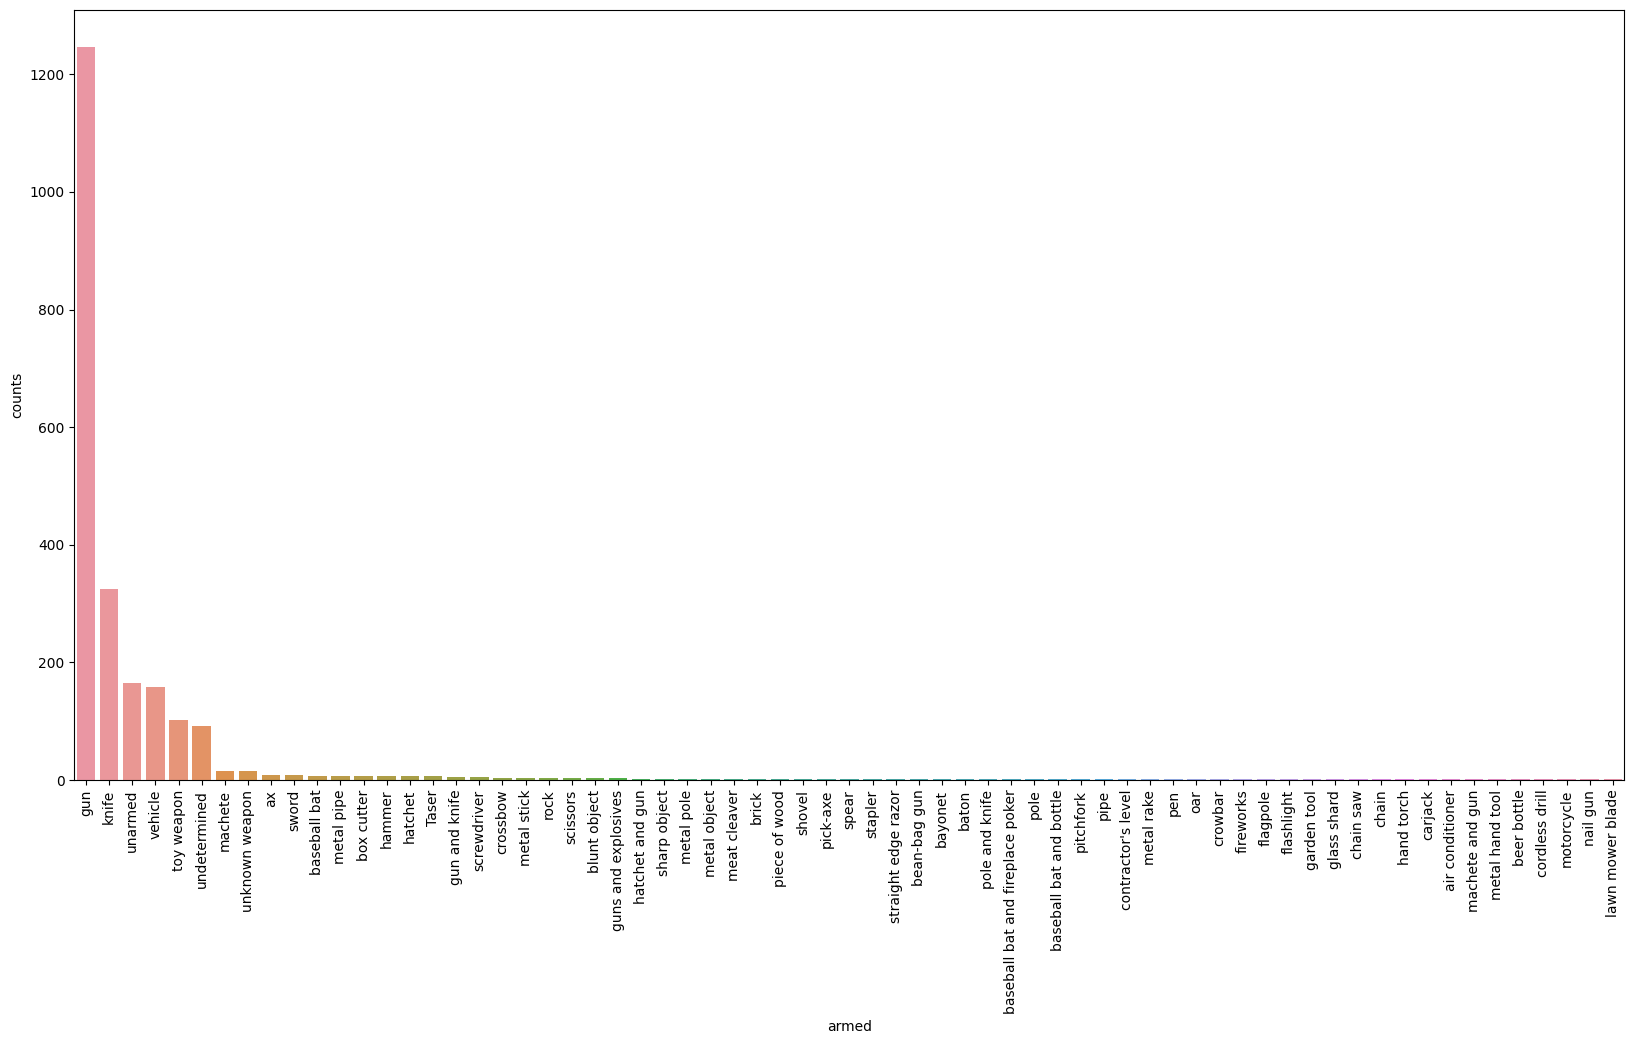

In [266]:
plt.figure(figsize=(20,10))

armed = df_fatalities.groupby('armed')['id'].count().sort_values(ascending=False).reset_index(name='counts')

sns.barplot(data=armed,
            x='armed',
            y='counts')

plt.xticks(rotation = 90)
plt.show()

# People Killed by Race

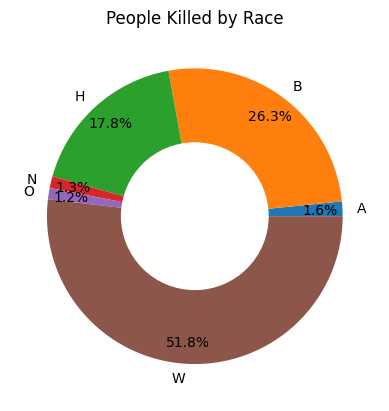

In [267]:
race_base_kill = df_fatalities.groupby('race')['manner_of_death'].count().reset_index(name='counts')
plt.pie(race_base_kill['counts'], labels=race_base_kill['race'],
        autopct='%1.1f%%', pctdistance=0.85)


centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('People Killed by Race')

plt.show()

<Figure size 2000x1000 with 0 Axes>

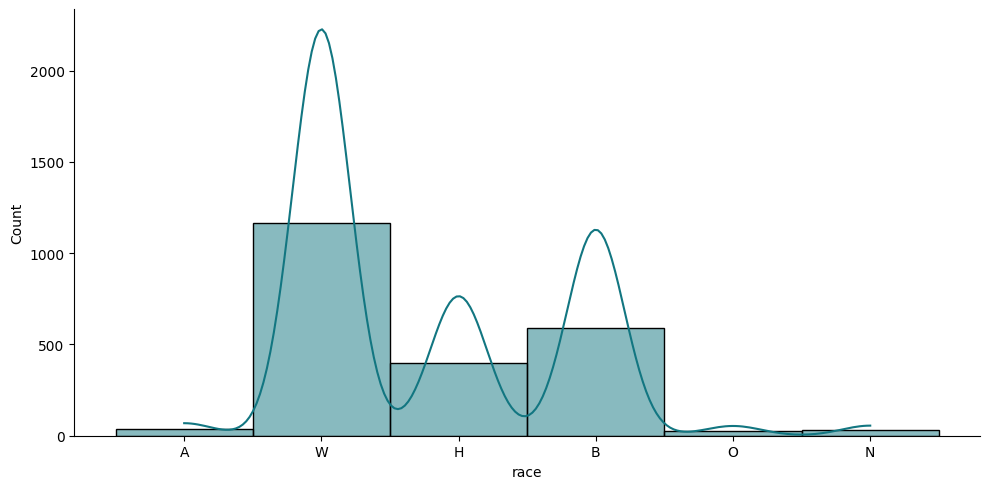

In [268]:
plt.figure(figsize=(20,10))

sns.displot(data=df_fatalities['race'],
            kde=True,
            aspect=2,
            bins=6,
            color='#127681')

plt.show()

# Race of People Killed


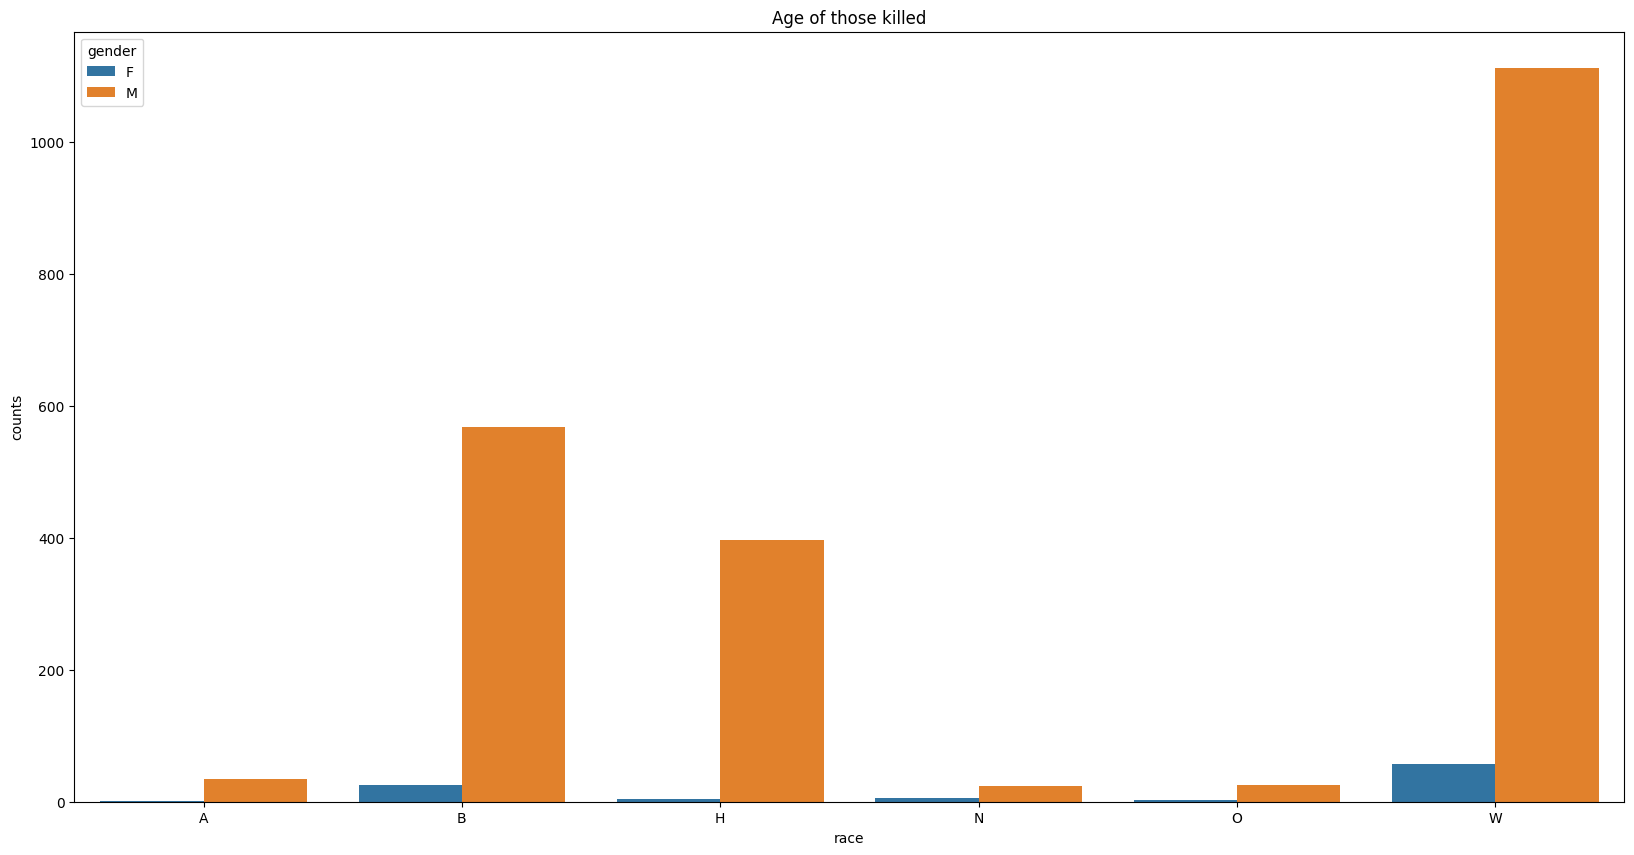

In [269]:
plt.figure(figsize=(20,10))
df_race_gender = df_fatalities.groupby(['race', 'gender'])['id'].count().reset_index(name='counts')
df_race_gender
sns.barplot(data=df_race_gender, x='race', y='counts', hue='gender')

plt.title('Age of those killed')

plt.show()

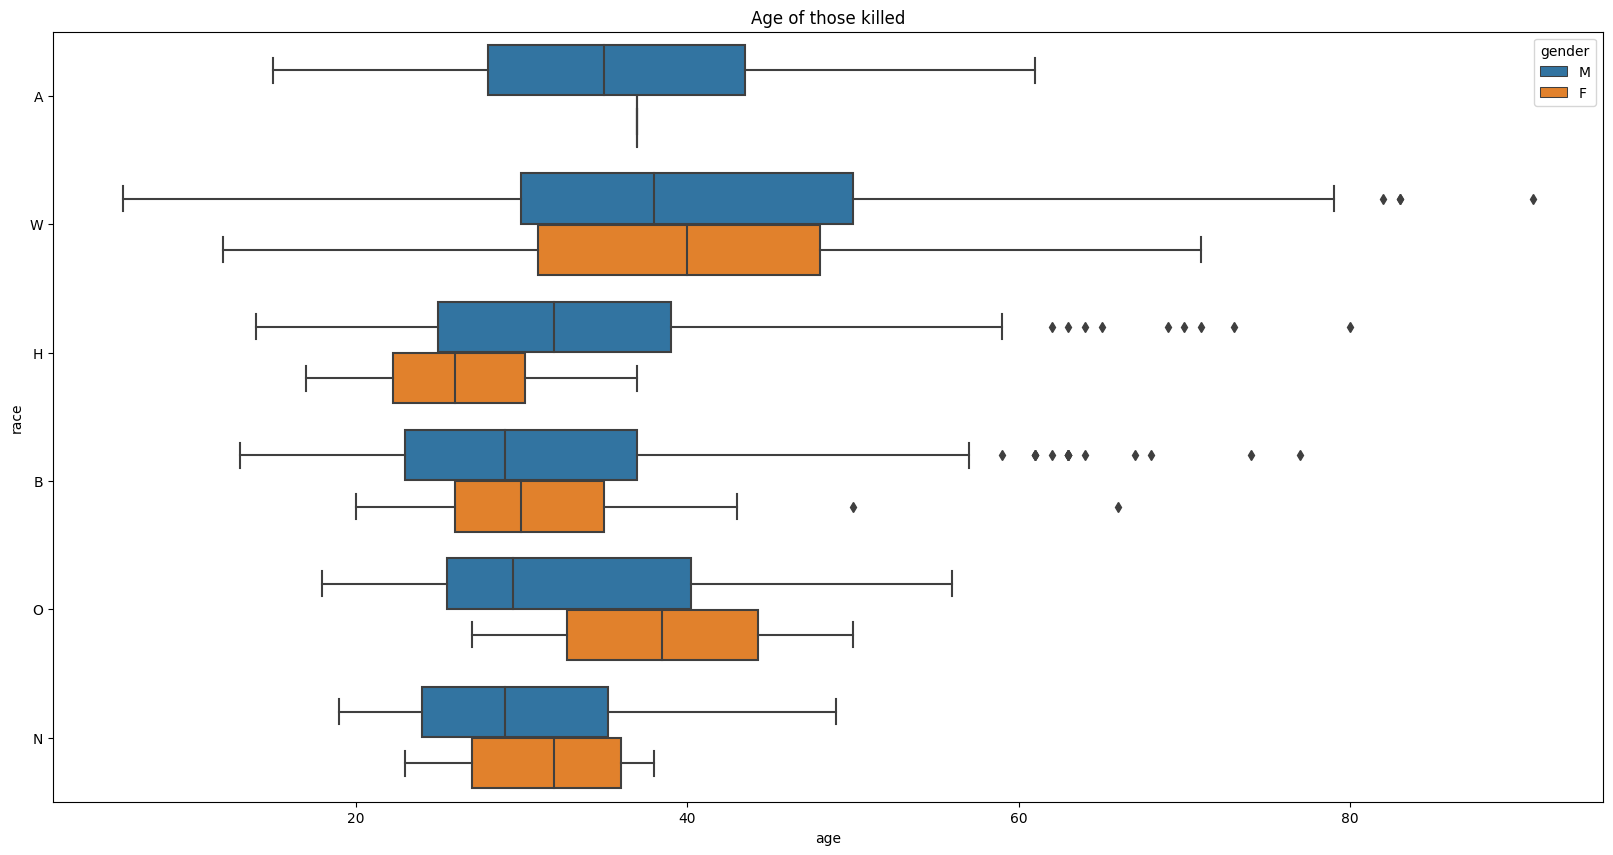

In [270]:
plt.figure(figsize=(20,10))

sns.boxplot(data=df_fatalities, x='age', y='race', hue='gender')

plt.title('Age of those killed')

plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

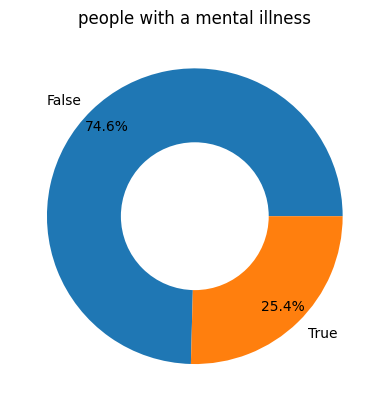

In [271]:
mental_illnessed = df_fatalities.groupby('signs_of_mental_illness')['id'].count().sort_values(ascending=False).reset_index(name='counts')
plt.pie(mental_illnessed['counts'], labels=mental_illnessed['signs_of_mental_illness'],
        autopct='%1.1f%%', pctdistance=0.85)


centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('people with a mental illness')

plt.show()

 # In Which States Do the Most Police Killings Take Place?

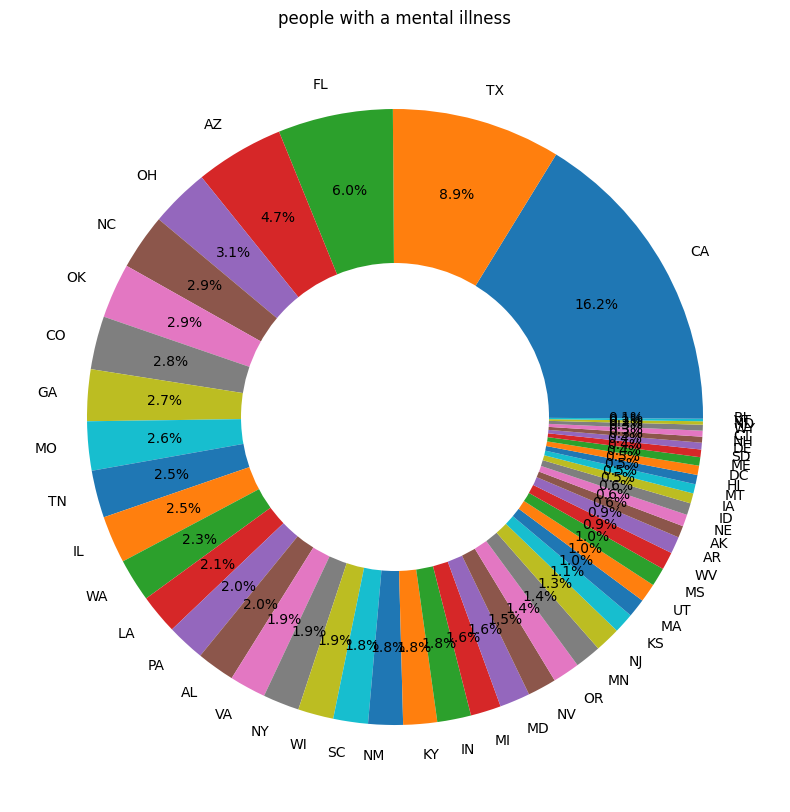

In [272]:
plt.figure(figsize=(10,10))

police_killing = df_fatalities.groupby('state')['id'].count().sort_values(ascending=False).reset_index(name='counts')

plt.pie(police_killing['counts'], labels=police_killing['state'],
        autopct='%1.1f%%', pctdistance=0.75)


centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('people with a mental illness')

plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Ranking the top 20 cities with the most police killings.

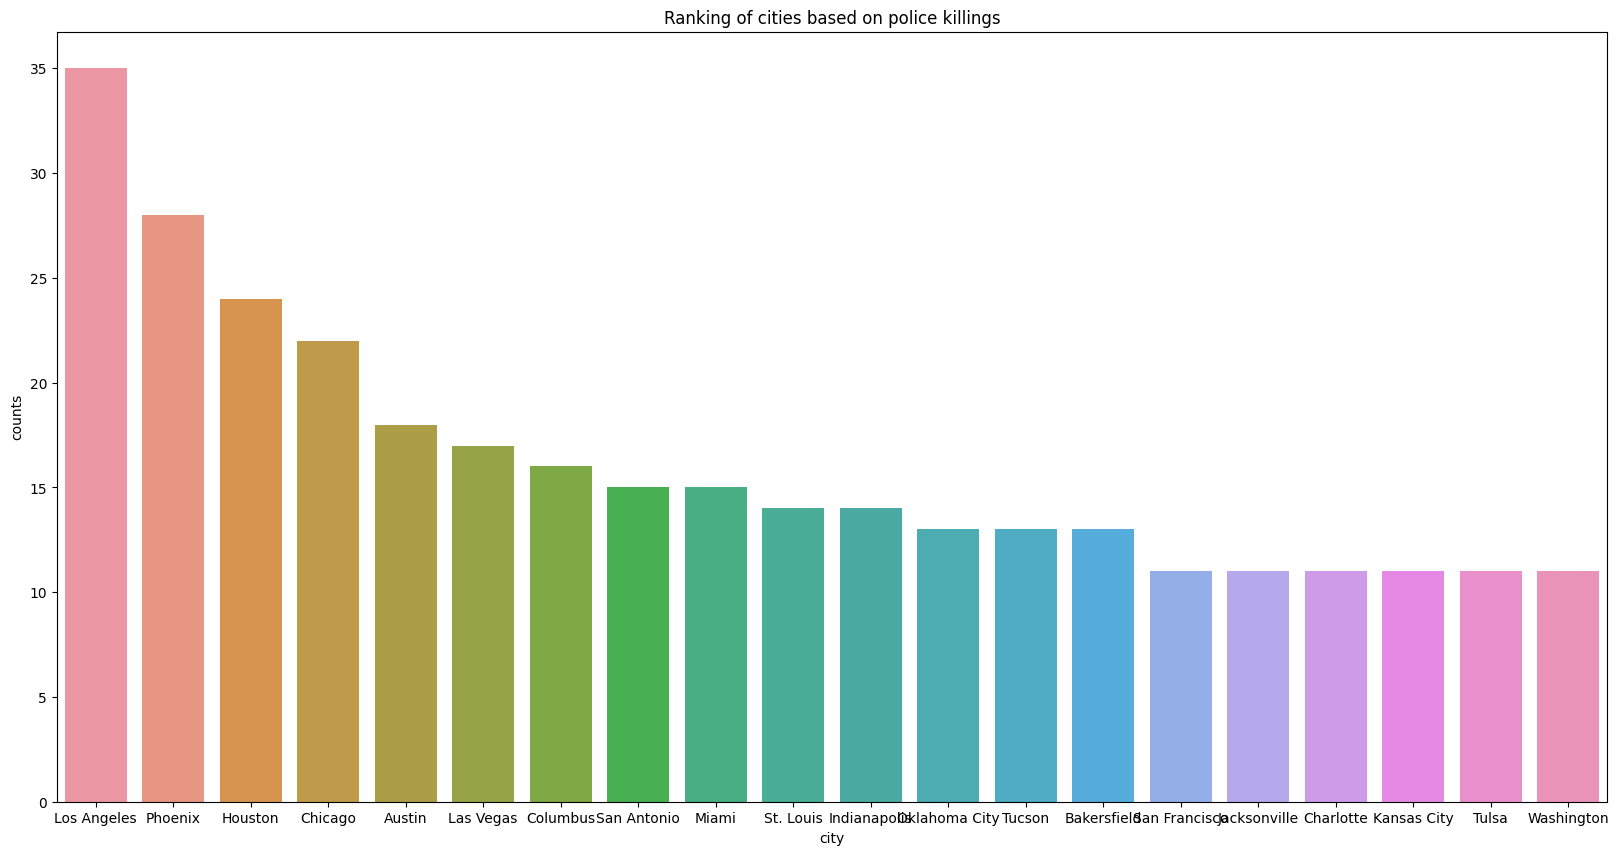

In [273]:
plt.figure(figsize=(20,10))

police_killing = df_fatalities.groupby('city')['id'].count().sort_values(ascending=False).reset_index(name='counts').head(20)
sns.barplot(data=police_killing, x='city', y='counts')

plt.title('Ranking of cities based on police killings')

plt.show()

# Number of Police Killings Over Time


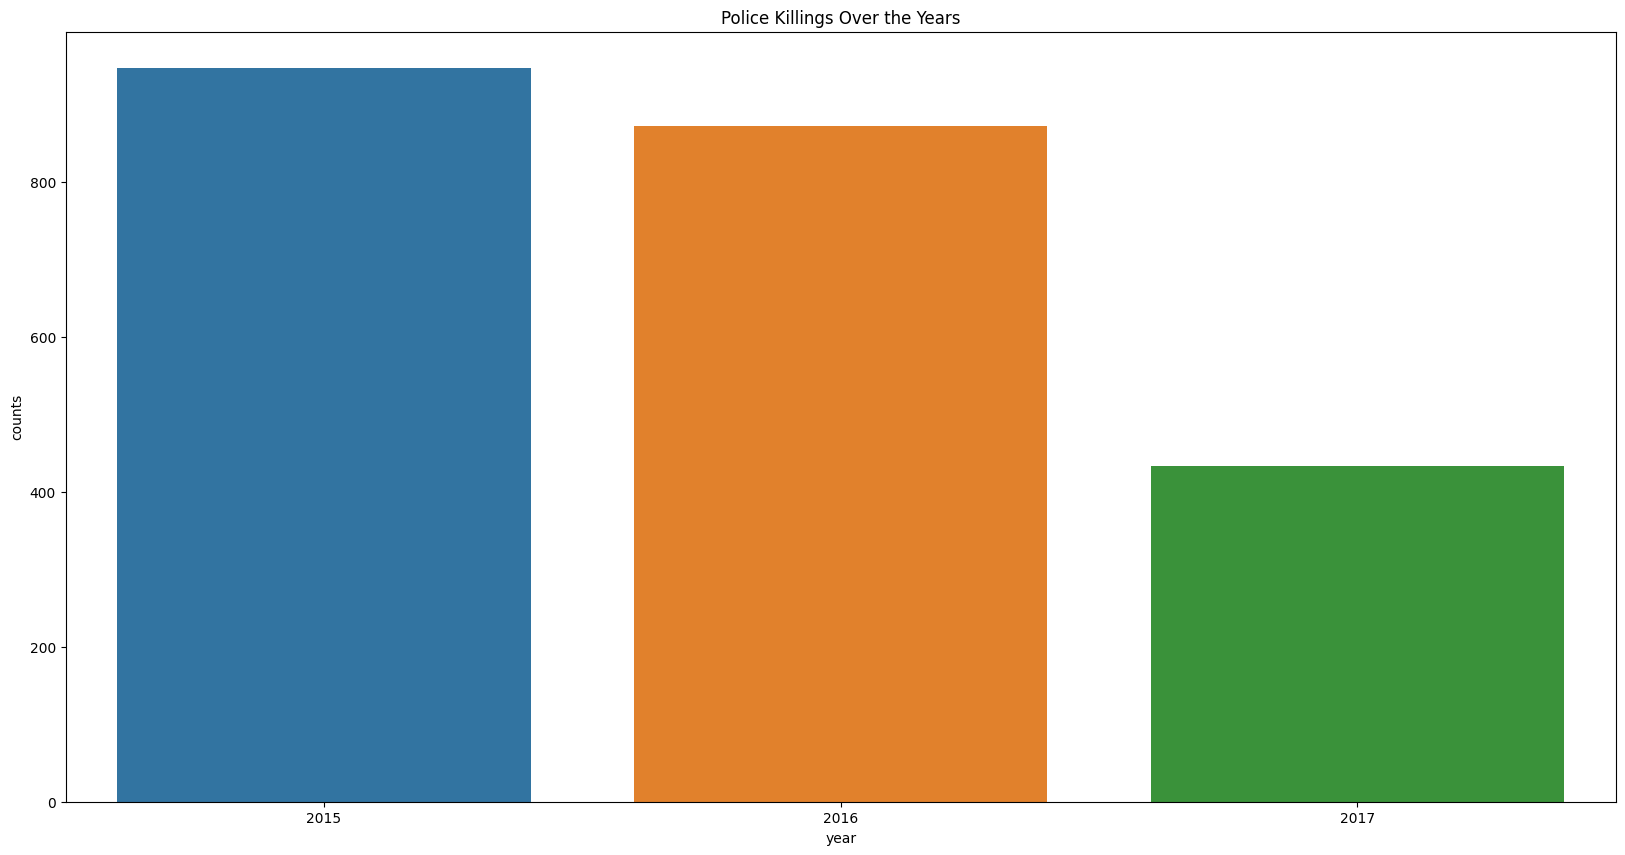

In [274]:
plt.figure(figsize=(20,10))

df_fatalities['year'] = pd.DatetimeIndex(df_fatalities['date']).year
killings_over_years = df_fatalities.groupby('year')['id'].count().reset_index(name='counts')
sns.barplot(data=killings_over_years, x='year', y='counts')

plt.title('Police Killings Over the Years')

plt.show()

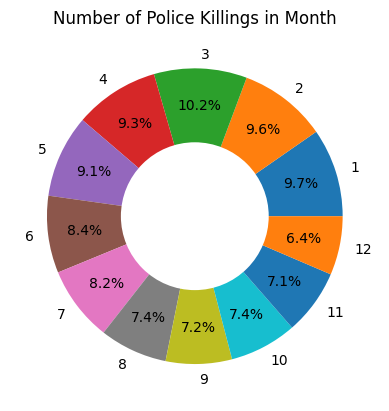

In [275]:
df_fatalities['month'] = pd.DatetimeIndex(df_fatalities['date']).month
killings_in_months = df_fatalities.groupby('month')['id'].count().reset_index(name='counts')
plt.pie(killings_in_months['counts'], labels=killings_in_months['month'],
        autopct='%1.1f%%', pctdistance=0.75)


centre_circle = plt.Circle((0, 0), 0.50, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Number of Police Killings in Month')

plt.show()

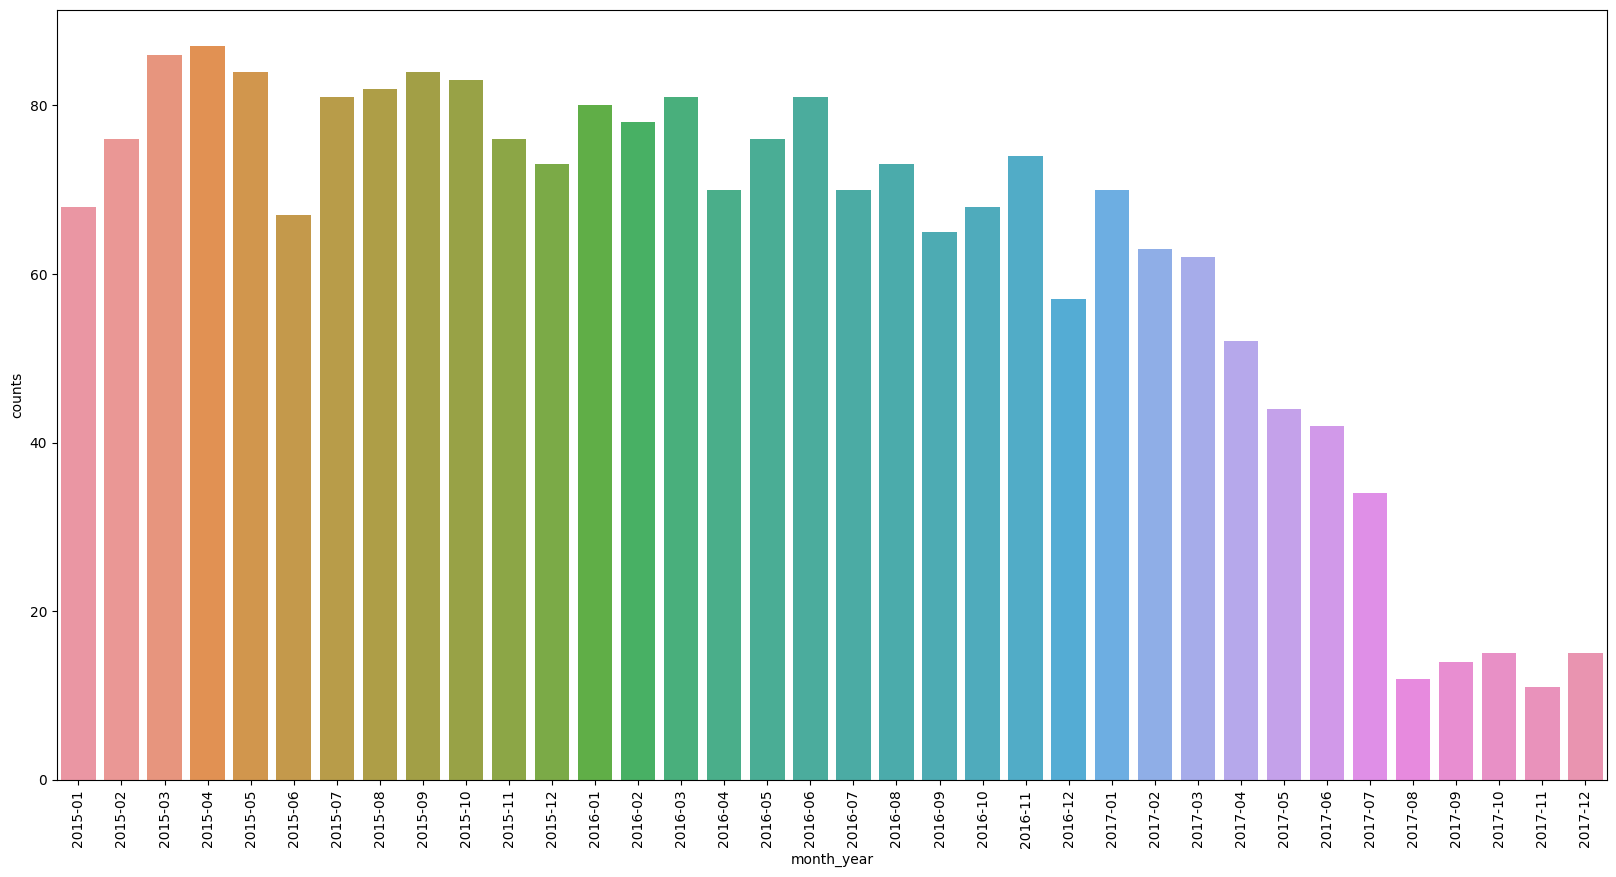

In [276]:
plt.figure(figsize=(20,10))

df_fatalities['month_year'] = pd.DatetimeIndex(df_fatalities['date']).to_period('M')

ax = df_fatalities.groupby('month_year')['id'].count().reset_index(name='counts')
sns.barplot(data=ax,
            x='month_year',
            y='counts')
plt.xticks(rotation = 90)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).